In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from dateutil import parser # 주간 필드를 구문 분석하기 위해 

In [2]:
# 데이터 불러오기
dataset = pd.read_csv('C:/Users/s/Desktop/udemy/ML/3. directing customers to subscription through app behavior analysis/dataset/appdata10.csv')

## EDA

In [3]:
dataset.head()

,user,first_open,dayofweek,hour,age,screen_list,numscreens,minigame,used_premium_feature,enrolled,enrolled_date,liked
0,235136,2012-12-27 02:14:51.273,3,02:00:00,23,"idscreen,joinscreen,Cycle,product_review,ScanP...",15,0,0,0,NaN,0
1,333588,2012-12-02 01:16:00.905,6,01:00:00,24,"joinscreen,product_review,product_review2,Scan...",13,0,0,0,NaN,0
2,254414,2013-03-19 19:19:09.157,1,19:00:00,23,"Splash,Cycle,Loan",3,0,1,0,NaN,1
3,234192,2013-07-05 16:08:46.354,4,16:00:00,28,"product_review,Home,product_review,Loan3,Finan...",40,0,0,1,2013-07-05 16:11:49.513,0
4,51549,2013-02-26 18:50:48.661,1,18:00:00,31,"idscreen,joinscreen,Cycle,Credit3Container,Sca...",32,0,0,1,2013-02-26 18:56:37.841,1


In [4]:
dataset.describe()

,user,dayofweek,age,numscreens,minigame,used_premium_feature,enrolled,liked
count,50000.000000,50000.000000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,186889.729900,3.029860,31.72436,21.095900,0.107820,0.172020,0.621480,0.165000
std,107768.520361,2.031997,10.80331,15.728812,0.310156,0.377402,0.485023,0.371184
min,13.000000,0.000000,16.00000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,93526.750000,1.000000,24.00000,10.000000,0.000000,0.000000,0.000000,0.000000
50%,187193.500000,3.000000,29.00000,18.000000,0.000000,0.000000,1.000000,0.000000
75%,279984.250000,5.000000,37.00000,28.000000,0.000000,0.000000,1.000000,0.000000
max,373662.000000,6.000000,101.00000,325.000000,1.000000,1.000000,1.000000,1.000000


위 자료를 통해 age 열은 평균나이가 31살
numscreens의 평균은 21,
10%의 사람들이 미니게임을 했으며,
17%의 사람들이 프리미엄기능을 사용했고,
약 17%의 사람들이 하나 이상의 기능에 좋아요를 눌렀습니다. 

hour column 이 나타나지 않는 이유 -> 날짜 형식의 문자열이기 때문.

In [5]:
# data cleaning , slice의 기본 형태 = slice[시작, 끝, step]
dataset['hour'].str.slice(1,3).astype(int)

0         2
1         1
2        19
3        16
4        18
         ..
49995    13
49996     0
49997    22
49998    12
49999     1
Name: hour, Length: 50000, dtype: int32

In [6]:
# dataframe에 덮어 씌워 주자
dataset['hour'] = dataset['hour'].str.slice(1,3).astype(int)

In [7]:
dataset.describe() # hour column 도 표현되는 것을 볼 수 있다.

,user,dayofweek,hour,age,numscreens,minigame,used_premium_feature,enrolled,liked
count,50000.000000,50000.000000,50000.000000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,186889.729900,3.029860,12.557220,31.72436,21.095900,0.107820,0.172020,0.621480,0.165000
std,107768.520361,2.031997,7.438072,10.80331,15.728812,0.310156,0.377402,0.485023,0.371184
min,13.000000,0.000000,0.000000,16.00000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,93526.750000,1.000000,5.000000,24.00000,10.000000,0.000000,0.000000,0.000000,0.000000
50%,187193.500000,3.000000,14.000000,29.00000,18.000000,0.000000,0.000000,1.000000,0.000000
75%,279984.250000,5.000000,19.000000,37.00000,28.000000,0.000000,0.000000,1.000000,0.000000
max,373662.000000,6.000000,23.000000,101.00000,325.000000,1.000000,1.000000,1.000000,1.000000


In [8]:
# 히스토 그램을 만들기 위해 필요없는 열들을 제거 해보자. data plotting
dataset2 = dataset.copy().drop(columns = ['user','screen_list','enrolled_date','first_open','enrolled'])
dataset2.head()

,dayofweek,hour,age,numscreens,minigame,used_premium_feature,liked
0,3,2,23,15,0,0,0
1,6,1,24,13,0,0,0
2,1,19,23,3,0,1,1
3,4,16,28,40,0,0,0
4,1,18,31,32,0,0,1


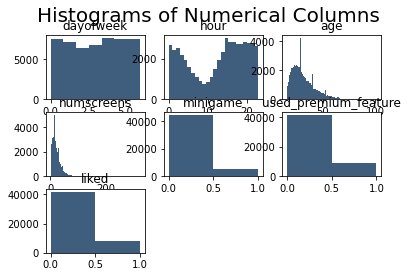

In [9]:
# histogram 데이터 세트의 분포를 알아보자. 
plt.suptitle('Histograms of Numerical Columns', fontsize = 20)
for i in range(1, dataset2.shape[1]+1): # 마지막 행을 포함하지 않기 때문에 1을 더해 범위를 8까지 넓힙니다.
    plt.subplot(3,3, i) # subplot으로 몇차원인지 가르쳐주자 -> 7개의 필드가 있으므로 3*3 그래프가 좋을 것 같습니다.
                        # subplot(row, column, index)
    f = plt.gca()       # gca 명령어로 모든 것을 정리하고 필드를 만들어 준다.
    f.set_title(dataset2.columns.values[i-1]) # 각 title 정해주기
    vals = np.size(dataset2.iloc[:,i-1].unique()) # 특성별 bin값 설정
    
    plt.hist(dataset2.iloc[:, i-1], bins= vals, color = '#3F5D7D')

### 위에서는 독립적인 특성을 알아봤다면, 수치적 특성의 상관관계를 위주로 살펴보겠습니다.

<AxesSubplot:title={'center':'Correlation with Response Variable'}>

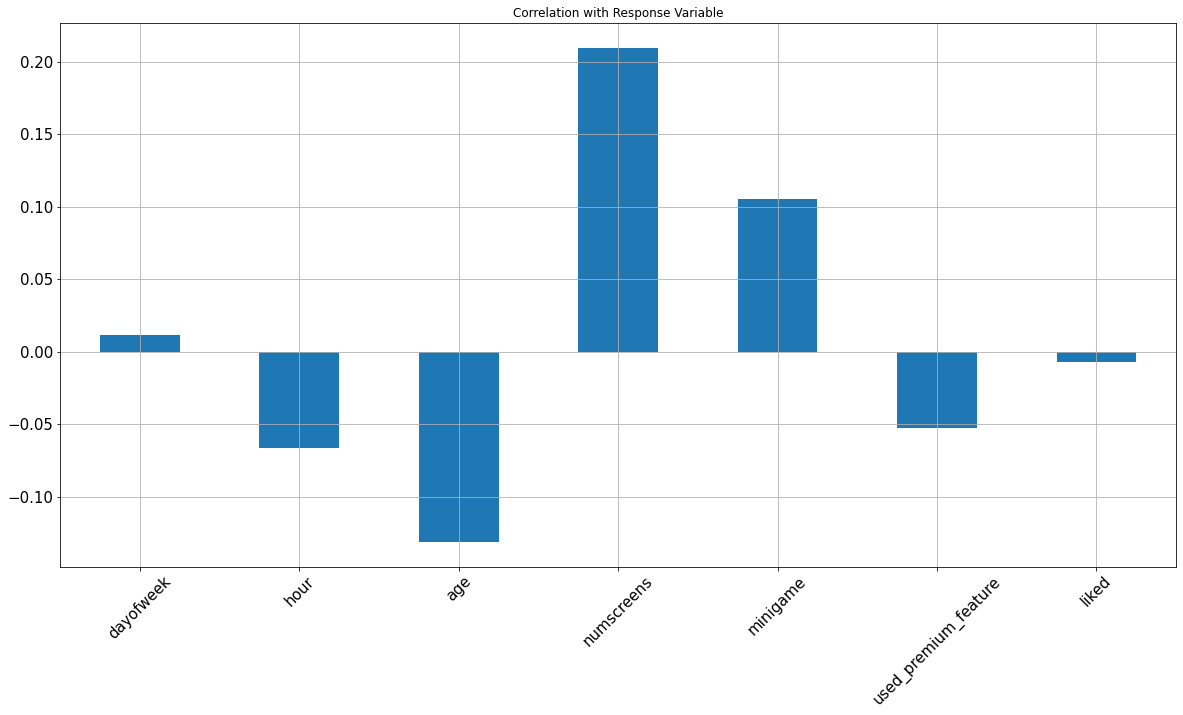

In [10]:
# correlation with response 어떤 변수가 반응변수에 관련이있을까.
dataset2.corrwith(dataset['enrolled']).plot.bar(figsize = (20,10), title = 'Correlation with Response Variable',
                                               fontsize  = 15, rot=45, grid = True) 
# corrwith 데이터 프레임의 모든 필드와 인수로 제공한 리스트간 상관관계 값 리스트를 반환, #gird = true 그래프에 격자가 들어감

젊은 사람이 제품에 등록할 확률이 높을 것같습니다. numscreens은 양의 상관관계가 있습니다. 직관적으로 이해가 되는 모습입니다.  

신기하게도 프리미엄 기능 사용은 음의 상관관계를 보입니다.   두드러지게 중요한 데이터는 보이지가 않습니다.

C:\Users\s\AppData\Local\Temp/ipykernel_15228/3692130596.py:7: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(corr, dtype=np.bool)


<AxesSubplot:>

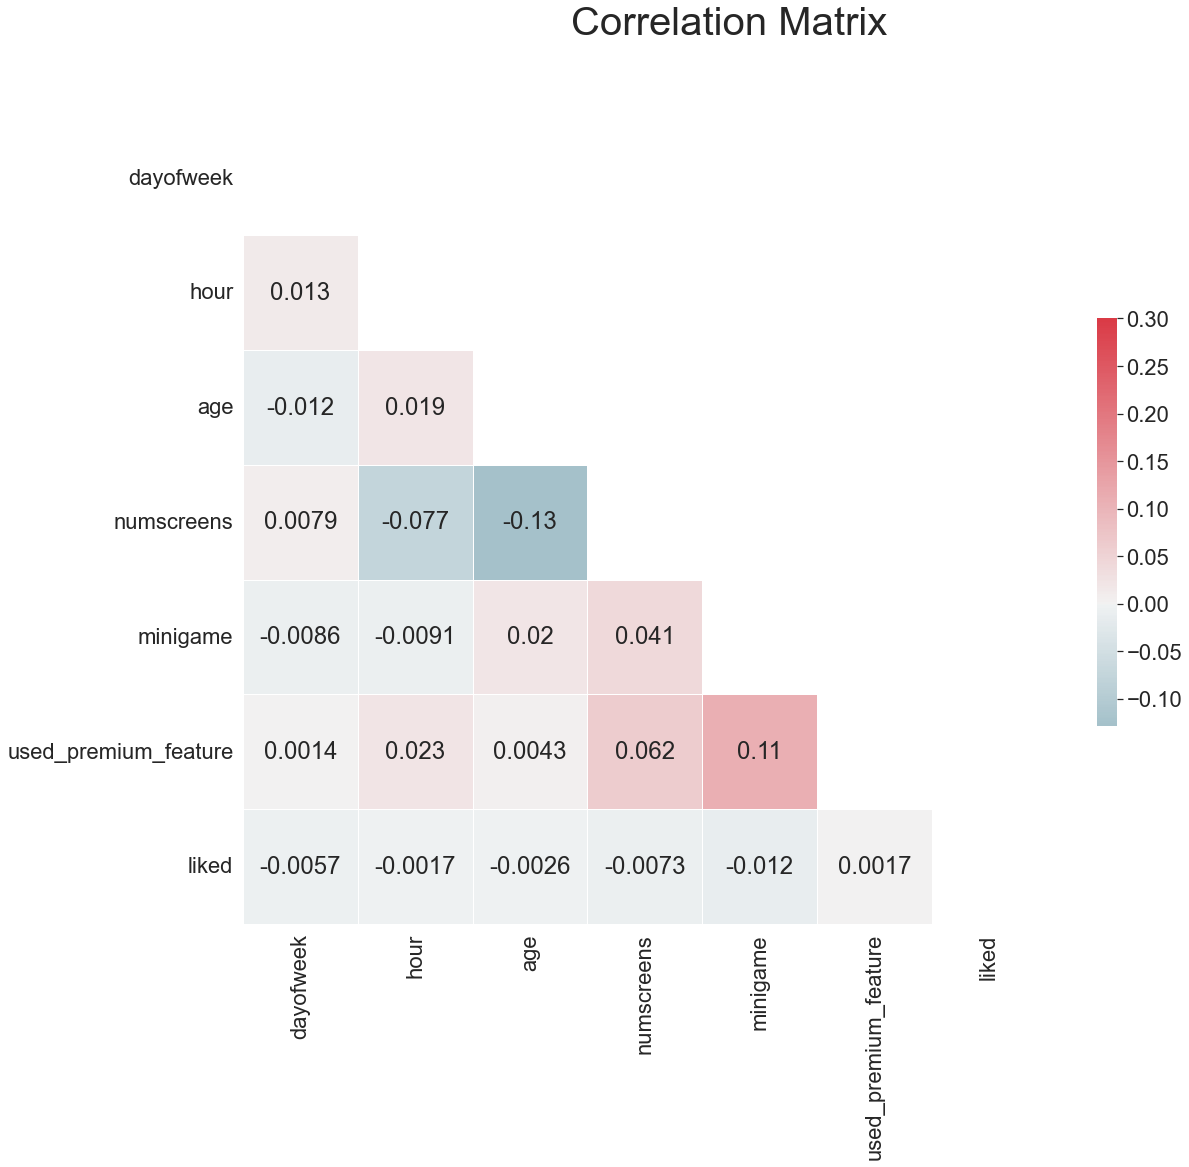

In [11]:
# correlation matrix -> 각 필드간의 관련성을 알아볼 수 있습니다. 머신러닝 모델을 구축할 때 각 필드들은 독립적이라는 가정을 합니다. 
              # 특성들이 종속되어 있으면 이 가정은 깨어지고 모델이 이상하게 변합니다.

sns.set(style = 'white', font_scale=2) # 배경을 만드는 코드 
corr = dataset2.corr() # Compute the correlation matrix

mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True # generate a mask for the upper trangle -> 행렬이 대칭이기 떄문에 한쪽만 보이게

f, ax = plt.subplots(figsize=(18,15))
f.suptitle('Correlation Matrix', fontsize=40) #set up the matplotlib figure

cmap = sns.diverging_palette(220,10, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0, square=True, linewidths=.5, cbar_kws={'shrink':.5}, annot = True)


시사점은 feature간 상관관계가 크지 않다는 것이다.

## 변수 가공
유저의 유료 회원 전환 예상 시점에 제한을 둬야 할 때가 있습니다. 미래 데이터 세트에서 모델을 검증하고자 하기 때문입니다.
예를 들어 등록을 고려하는데 일주일의 시간 제한이 있다면 설치 후 일주일만 기다리면 해당 유저를 예측하는 모델의 정확도를 알 수 있습니다. 그러나 모델이 모든 시간 등록에 대해 예측했다면 모델이 정확한지 확인하기 위해 모든 시간이 끝날 때까지 기다려야 합니다.

따라서 반응변수에 날짜 범위 제한을 두는 것이 중요합니다. 

처음 앱을 연 날짜와 등록 날짜 사이의 시간 차이 분포를 도식화 하려합니다. 그렇게 하기 위해 변수가공을 시작해야됩니다.

In [12]:
dataset.dtypes

user                     int64
first_open              object
dayofweek                int64
hour                     int32
age                      int64
screen_list             object
numscreens               int64
minigame                 int64
used_premium_feature     int64
enrolled                 int64
enrolled_date           object
liked                    int64
dtype: object

In [13]:
# 날짜와 시간에서 다른 날짜와 시간을 뺼 수 있도록 타입을  datetime으로 번경
dataset['first_open']=[parser.parse(row_data) for row_data in dataset['first_open']]
dataset['enrolled_date']=[parser.parse(row_data) if isinstance(row_data, str) else row_data for row_data in dataset['enrolled_date']] 
# nan 값이 있기에 if isinstance else

In [14]:
dataset.dtypes

user                             int64
first_open              datetime64[ns]
dayofweek                        int64
hour                             int32
age                              int64
screen_list                     object
numscreens                       int64
minigame                         int64
used_premium_feature             int64
enrolled                         int64
enrolled_date           datetime64[ns]
liked                            int64
dtype: object

In [15]:
dataset['difference'] = (dataset['enrolled_date'] - dataset['first_open']).astype('timedelta64[h]') # 사간차이를 시간단위로

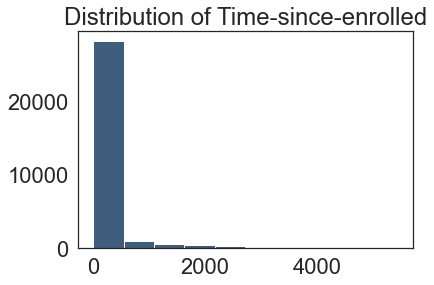

In [16]:
plt.hist(dataset['difference'].dropna(),color = '#3F5D7D')
plt.title('Distribution of Time-since-enrolled')
plt.show()

대부분의 사람들이 약 500 시간 내에 유로 프리미엄으로 등록한다고 볼 수 있다.

자세하게 100시간 이내로 확인해보자. 윗 코드에서 range 를 넣어준다.

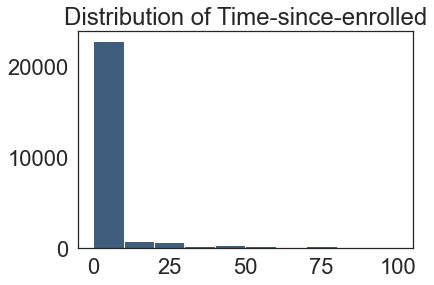

In [17]:
plt.hist(dataset['difference'].dropna(),color = '#3F5D7D', range=[0,100])
plt.title('Distribution of Time-since-enrolled')
plt.show()

즉 모든 등록이 거의 10시간이내 이뤄진다고 봐도 되겠군요.

In [18]:
# 48시간을 기준으로 확인해보자.
dataset.loc[dataset['difference'] > 48, 'enrolled' ] = 0   # 48 시간 초과데이터 삭제

In [19]:
# 필요없는 feature 삭제
dataset = dataset.drop(columns=['difference', 'enrolled_date', 'first_open'])

In [20]:
dataset.head()

,user,dayofweek,hour,age,screen_list,numscreens,minigame,used_premium_feature,enrolled,liked
0,235136,3,2,23,"idscreen,joinscreen,Cycle,product_review,ScanP...",15,0,0,0,0
1,333588,6,1,24,"joinscreen,product_review,product_review2,Scan...",13,0,0,0,0
2,254414,1,19,23,"Splash,Cycle,Loan",3,0,1,0,1
3,234192,4,16,28,"product_review,Home,product_review,Loan3,Finan...",40,0,0,1,0
4,51549,1,18,31,"idscreen,joinscreen,Cycle,Credit3Container,Sca...",32,0,0,1,1


screen_list는 24시간동안 방문했던 화면들이 나열되어있습니다. top_screens data를 사용해 이 변수의 가공을 해봅시다.

In [21]:
top_screens = pd.read_csv('C:/Users/s/Desktop/udemy/ML/3. directing customers to subscription through app behavior analysis/dataset/top_screens.csv').top_screens.values

In [22]:
top_screens

array(['Loan2', 'location', 'Institutions', 'Credit3Container',
       'VerifyPhone', 'BankVerification', 'VerifyDateOfBirth',
       'ProfilePage', 'VerifyCountry', 'Cycle', 'idscreen',
       'Credit3Dashboard', 'Loan3', 'CC1Category', 'Splash', 'Loan',
       'CC1', 'RewardsContainer', 'Credit3', 'Credit1', 'EditProfile',
       'Credit2', 'Finances', 'CC3', 'Saving9', 'Saving1', 'Alerts',
       'Saving8', 'Saving10', 'Leaderboard', 'Saving4', 'VerifyMobile',
       'VerifyHousing', 'RewardDetail', 'VerifyHousingAmount',
       'ProfileMaritalStatus', 'ProfileChildren ', 'ProfileEducation',
       'Saving7', 'ProfileEducationMajor', 'Rewards', 'AccountView',
       'VerifyAnnualIncome', 'VerifyIncomeType', 'Saving2', 'Saving6',
       'Saving2Amount', 'Saving5', 'ProfileJobTitle', 'Login',
       'ProfileEmploymentLength', 'WebView', 'SecurityModal', 'Loan4',
       'ResendToken', 'TransactionList', 'NetworkFailure', 'ListPicker'],
      dtype=object)

In [24]:
dataset['screen_list'] = dataset.screen_list.astype(str)+ ',' # 콤마로 화면의 수를 세기 위해 콤마를 하나 추가해 화면의 갯수와 맞게설정


In [27]:
for sc in top_screens:
    dataset[sc] = dataset.screen_list.str.contains(sc).astype(int) # top스크린을 포함한다면 1 아니면 0 반환
    dataset['screen_list'] = dataset.screen_list.str.replace(sc+',', '')

In [30]:
dataset['other'] = dataset.screen_list.str.count(',') # 쉼표의 갯수로 몇개가 남아있는 지 확인가능

In [31]:
dataset # 매핑이 완료

,user,dayofweek,hour,age,screen_list,numscreens,minigame,used_premium_feature,enrolled,liked,...,Login,ProfileEmploymentLength,WebView,SecurityModal,Loan4,ResendToken,TransactionList,NetworkFailure,ListPicker,other
0,235136,3,2,23,"joinscreen,product_review,ScanPreview,VerifyTo...",15,0,0,0,0,...,1,0,0,0,0,0,0,0,0,7
1,333588,6,1,24,"joinscreen,product_review,product_review2,Scan...",13,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5
2,254414,1,19,23,,3,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
3,234192,4,16,28,"product_review,Home,product_review,ReferralCon...",40,0,0,1,0,...,0,0,0,0,0,0,0,0,0,6
4,51549,1,18,31,"joinscreen,ScanPreview,VerifySSN,Home,SelectIn...",32,0,0,1,1,...,0,0,0,0,0,0,0,0,0,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,222774,3,13,32,"Home,ScanPreview,VerifySSN,product_review,prod...",13,0,0,1,0,...,0,0,1,0,0,0,0,0,0,6
49996,169179,1,0,35,"Home,",4,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
49997,302367,2,22,39,"joinscreen,product_review,product_review2,Scan...",25,0,0,0,0,...,0,0,0,0,0,0,0,0,0,6
49998,324905,6,12,27,"Home,product_review,product_review,product_rev...",26,0,0,1,0,...,0,0,0,0,0,0,0,0,0,13


In [32]:
dataset = dataset.drop(columns = ['screen_list'])

funnels 작업 :  퍼널은 동일한 세트에 속하는 화면 그룹
상관관계가 있으면 문제를 일으키므로 화면 가치를 유지하기 위해 모든 화면을 하나로 그룹화

In [33]:
# Funnels
savings_screens = ["Saving1",
                    "Saving2",
                    "Saving2Amount",
                    "Saving4",
                    "Saving5",
                    "Saving6",
                    "Saving7",
                    "Saving8",
                    "Saving9",
                    "Saving10"]

In [34]:
dataset['savingscount'] = dataset[savings_screens].sum(axis =1)

In [35]:
dataset = dataset.drop(columns = savings_screens)

In [36]:
dataset

,user,dayofweek,hour,age,numscreens,minigame,used_premium_feature,enrolled,liked,Loan2,...,ProfileEmploymentLength,WebView,SecurityModal,Loan4,ResendToken,TransactionList,NetworkFailure,ListPicker,other,savingscount
0,235136,3,2,23,15,0,0,0,0,1,...,0,0,0,0,0,0,0,0,7,0
1,333588,6,1,24,13,0,0,0,0,1,...,0,0,0,0,0,0,0,0,5,0
2,254414,1,19,23,3,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,234192,4,16,28,40,0,0,1,0,0,...,0,0,0,0,0,0,0,0,6,0
4,51549,1,18,31,32,0,0,1,1,1,...,0,0,0,0,0,0,0,0,10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,222774,3,13,32,13,0,0,1,0,0,...,0,1,0,0,0,0,0,0,6,0
49996,169179,1,0,35,4,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
49997,302367,2,22,39,25,0,0,0,0,0,...,0,0,0,0,0,0,0,0,6,0
49998,324905,6,12,27,26,0,0,1,0,0,...,0,0,0,0,0,0,0,0,13,0


In [37]:
# 위와 같이 상관관계 있는 화면들 funnel
cm_screens = ["Credit1",
               "Credit2",
               "Credit3",
               "Credit3Container",
               "Credit3Dashboard"]
dataset["CMCount"] = dataset[cm_screens].sum(axis=1)
dataset = dataset.drop(columns=cm_screens)

cc_screens = ["CC1",
                "CC1Category",
                "CC3"]
dataset["CCCount"] = dataset[cc_screens].sum(axis=1)
dataset = dataset.drop(columns=cc_screens)

loan_screens = ["Loan",
               "Loan2",
               "Loan3",
               "Loan4"]
dataset["LoansCount"] = dataset[loan_screens].sum(axis=1)
dataset = dataset.drop(columns=loan_screens)


In [38]:
dataset.head()

,user,dayofweek,hour,age,numscreens,minigame,used_premium_feature,enrolled,liked,location,...,SecurityModal,ResendToken,TransactionList,NetworkFailure,ListPicker,other,savingscount,CMCount,CCCount,LoansCount
0,235136,3,2,23,15,0,0,0,0,0,...,0,0,0,0,0,7,0,0,0,1
1,333588,6,1,24,13,0,0,0,0,1,...,0,0,0,0,0,5,0,0,0,1
2,254414,1,19,23,3,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,1
3,234192,4,16,28,40,0,0,1,0,1,...,0,0,0,0,0,6,0,3,0,1
4,51549,1,18,31,32,0,0,1,1,0,...,0,0,0,0,0,10,0,2,0,1


In [39]:
# 자체 데이터 세트를 저장하자 index=false로 인덱스 지우자
dataset.to_csv('C:/Users/s/Desktop/udemy/ML/3. directing customers to subscription through app behavior analysis/dataset/new_appdata100.csv',index=False)

## 모델 구축

In [59]:
import pandas as pd
import pandas as np
import seaborn as sns
import matplotlib.pyplot as plt
import time

In [60]:
dataset = pd.read_csv('C:/Users/s/Desktop/udemy/ML/3. directing customers to subscription through app behavior analysis/dataset/new_appdata100.csv')

In [61]:
# data preprocessing
# 반응변수부터 떄어내자
response = dataset['enrolled']
dataset = dataset.drop(columns = 'enrolled')

In [62]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(dataset, response, test_size=0.2, random_state = 0)

In [63]:
x_train.head()

,user,dayofweek,hour,age,numscreens,minigame,used_premium_feature,liked,location,Institutions,...,SecurityModal,ResendToken,TransactionList,NetworkFailure,ListPicker,other,savingscount,CMCount,CCCount,LoansCount
20330,315793,2,20,32,5,0,1,1,0,0,...,0,0,0,0,0,2,0,0,0,2
17532,103347,1,21,22,42,1,0,0,1,1,...,0,0,0,0,0,13,0,1,0,1
45819,373340,0,4,26,85,1,0,0,0,1,...,0,0,0,0,0,10,0,2,1,2
34807,324006,4,13,25,24,1,0,0,1,0,...,0,0,0,0,0,10,0,0,0,1
31888,248759,3,16,50,11,0,0,0,1,0,...,0,0,0,0,0,3,0,2,0,0


 현재 user은 그냥 식별자이기 때문에 제거해주겠습니다. 하지만 모델예측을 했을 때 user와 연결지어야 한다는 것을 잊지마세요.
 따라서 user를 저장한 뒤 없애주겠습니다.

In [64]:
train_identifier = x_train['user']

In [65]:
x_train = x_train.drop(columns = 'user')

In [66]:
# test 셋도 마찬가지
test_identifier = x_test['user']
x_test = x_test.drop(columns = 'user')

#### scailing

In [67]:
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()

In [68]:
# standardscaler 의 특징은 다차원의 numpy 배열을 반환합니다. 문제는 열 이름과 인덱스가 손실됩니다. 하지만 인덱스로
# 유저간의 필드 집합을 식별하기 때문에 인덱스 정보도 필요하고 모델을 구성하는 열이름이 필요해서 열 정보도 중요합니다.
# 그래서 표준화 부분은 다른 데이터 프레임에 저장하겠습니다. 
x_train2 = pd.DataFrame(sc_x.fit_transform(x_train))
x_test2 = pd.DataFrame(sc_x.fit_transform(x_test))

In [71]:
x_train2.columns = x_train.columns.values
x_test2.columns = x_test.columns.values

In [73]:
# 인덱스 통합
x_train2.index = x_train.index.values
x_test2.index = x_test.index.values

In [74]:
x_train2.head()

,dayofweek,hour,age,numscreens,minigame,used_premium_feature,liked,location,Institutions,VerifyPhone,...,SecurityModal,ResendToken,TransactionList,NetworkFailure,ListPicker,other,savingscount,CMCount,CCCount,LoansCount
20330,-0.504961,1.000837,0.025525,-1.026726,-0.346830,2.186018,2.246319,-1.039218,-0.644848,-1.052581,...,-0.119697,-0.11742,-0.115879,-0.091207,-0.087221,-1.147303,-0.260877,-0.763372,-0.289185,1.785389
17532,-0.997389,1.135280,-0.898034,1.328829,2.883254,-0.457453,-0.445173,0.962262,1.550753,0.950046,...,-0.119697,-0.11742,-0.115879,-0.091207,-0.087221,1.839740,-0.260877,0.057524,-0.289185,0.309800
45819,-1.489818,-1.150250,-0.528611,4.066366,2.883254,-0.457453,-0.445173,-1.039218,1.550753,-1.052581,...,-0.119697,-0.11742,-0.115879,-0.091207,-0.087221,1.025092,-0.260877,0.878421,1.336593,1.785389
34807,0.479896,0.059736,-0.620967,0.182883,2.883254,-0.457453,-0.445173,0.962262,-0.644848,-1.052581,...,-0.119697,-0.11742,-0.115879,-0.091207,-0.087221,1.025092,-0.260877,-0.763372,-0.289185,0.309800
31888,-0.012532,0.463065,1.687932,-0.644744,-0.346830,-0.457453,-0.445173,0.962262,-0.644848,0.950046,...,-0.119697,-0.11742,-0.115879,-0.091207,-0.087221,-0.875753,-0.260877,0.878421,-0.289185,-1.165789


In [75]:
x_train = x_train2
x_test = x_test2

### model building

In [88]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state=0, penalty = 'l1', solver='liblinear')
# penalty는 정규화된 로지스틱 회귀 모델을 l1 정규화 모델로 바꿔줍니다. 왜 이렇게 할까요?
# 같은 funnel에 있지 않더라도 스크린간 상관관계가 있을 수 있기 때문입니다.
# L1 패널티와 L1 정규화가 하는 일은 반응 변수에 강하게 연관되어 있는 특정 필들에 패널티를 부과하는 것 입니다.

In [89]:
classifier.fit(x_train, y_train)

LogisticRegression(penalty='l1', random_state=0, solver='liblinear')

In [90]:
y_pred = classifier.predict(x_test)

In [92]:
y_pred

array([1, 1, 0, ..., 0, 1, 1], dtype=int64)

In [94]:
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score

In [96]:
cm = confusion_matrix(y_test, y_pred)
accuracy_score(y_test, y_pred)

0.7679

In [97]:
precision_score(y_test, y_pred)

0.760856513908345

In [98]:
recall_score(y_test, y_pred)

0.7715097402597403

In [99]:
f1_score(y_test, y_pred)

0.7661460957178842

Test Data Accuracy: 0.7679


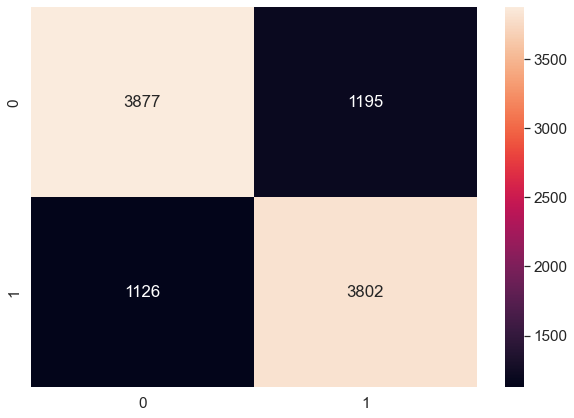

In [101]:
# confusion matrix 시각화
df_cm = pd.DataFrame(cm, index = (0, 1), columns = (0, 1))
plt.figure(figsize = (10,7))
sns.set(font_scale=1.4)
sns.heatmap(df_cm, annot=True, fmt='g')
print("Test Data Accuracy: %0.4f" % accuracy_score(y_test, y_pred))

과적합 되었나??? -> k-fold validation 해보겠습니다.

In [105]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X= x_train, y= y_train, cv=10)
print('Logistic Accuracy : %0.3f (+/- %0.3f)' %(accuracies.mean(), accuracies.std()*2))

Logistic Accuracy : 0.767 (+/- 0.009)


## Formatting the final results

실제 유저와 매칭해야 하기 때문에 마지막 매칭하는 결과도 중요합니다.

In [106]:
final_results = pd.concat([y_test, test_identifier], axis=1).dropna() # 유저에게 매칭

In [107]:
final_results['predicted_results'] = y_pred

In [115]:
final_results[['user', 'enrolled', 'predicted_results']].reset_index(drop=True)

,user,enrolled,predicted_results
0,239786,1,1
1,279644,1,1
2,98290,0,0
3,170150,1,1
4,237568,1,1
...,...,...,...
9995,143036,1,0
9996,91158,1,1
9997,248318,0,0
9998,142418,1,1
